In [1]:
%load_ext autoreload
%autoreload 2

# general
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from src.economics import run_economic_analysis

# data = run_economic_analysis.step_load_data(verbose=False)
# aligned = run_economic_analysis.step_align_data(data, verbose=True)

# # total_tourism_value_gdf.groupby("country")["approx_price_corrected"].sum().sort_values(ascending=False).head(10)
# total_tourism_value_gdf["approx_price_corrected"].sum() / 1e9
# # TODO: this (load_tourism_data) isn't matching with my implementation


############################################################
# CORAL REEF ECONOMICS ANALYSIS PIPELINE
############################################################

Started at: 2026-01-19 11:52:09

STEP 1: LOADING DATA

────────────────────────────────────────────────────────────
📊 CORAL COVER DATA LOADED FROM data/sully_2022/data_for_maps.csv
────────────────────────────────────────────────────────────
  Sites: 7,714
  Countries: 76
  Projection columns: 4
  Change columns: 4

  📈 Coral Cover Statistics:
     average_coral_cover: min=0.006, max=0.988, mean=0.332
     y_new (model baseline): min=0.060, max=0.810, mean=0.332

  📉 Projected Changes (percentage points):
     rcp45 2050: mean=-3.1pp, range=[-12.5, +1.7]
     rcp45 2100: mean=-4.7pp, range=[-12.8, +1.8]
     rcp85 2050: mean=-4.4pp, range=[-13.3, -0.2]
     rcp85 2100: mean=-10.5pp, range=[-20.6, -2.4]

  📉 Projected Changes (percentage points relative to baseline):
     rcp45 2050: mean=-10.1pp, range=[-34.5, +5.5]
     rc

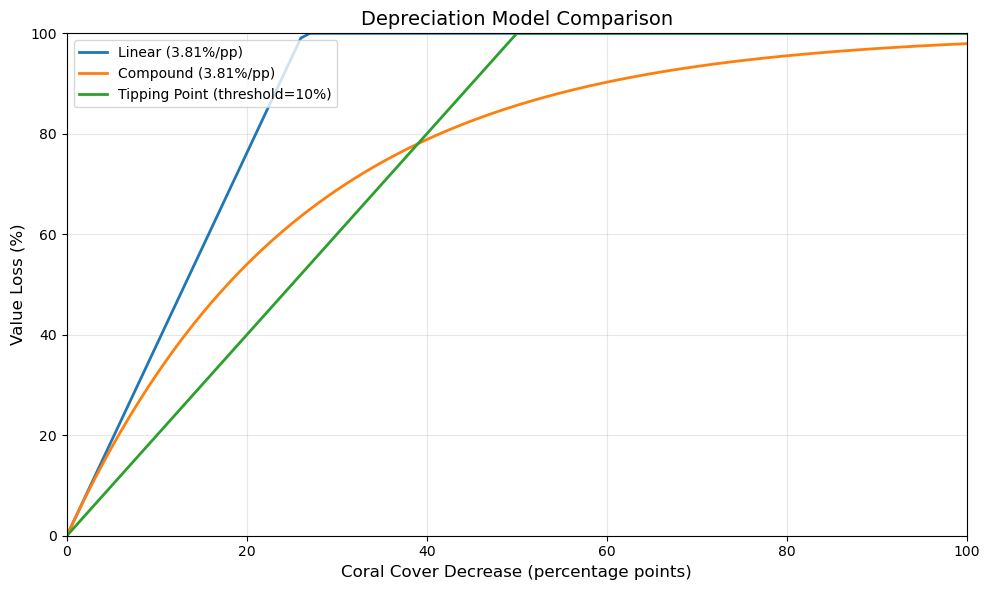

In [2]:
results = run_economic_analysis.run_pipeline()

In [15]:
prev_results = run_economic_analysis.load_previous_results("run_20260119_120017")


LOADING PREVIOUS RESULTS
  Loading from: /Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/reef_cover_economics/results/run_20260119_120017
  ✓ Loaded 12 cumulative impact results

  ✓ Loaded 12 analysis results
  ✓ Loaded 12 cumulative impact results


In [ ]:
prev_results["results"].results.keys()

dict_keys(['tourism_RCP45_yr_2100_Linear_(3.81%_pp)', 'tourism_RCP85_yr_2100_Linear_(3.81%_pp)', 'tourism_RCP45_yr_2050_Tipping_Point_(threshold=10%)', 'tourism_RCP45_yr_2100_Compound_(3.81%_pp)', 'tourism_RCP45_yr_2100_Tipping_Point_(threshold=10%)', 'tourism_RCP85_yr_2100_Compound_(3.81%_pp)', 'tourism_RCP85_yr_2100_Tipping_Point_(threshold=10%)', 'tourism_RCP45_yr_2050_Compound_(3.81%_pp)', 'tourism_RCP45_yr_2050_Linear_(3.81%_pp)', 'tourism_RCP85_yr_2050_Linear_(3.81%_pp)', 'tourism_RCP85_yr_2050_Compound_(3.81%_pp)', 'tourism_RCP85_yr_2050_Tipping_Point_(threshold=10%)'])

In [ ]:
/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/reef_cover_economics/figures/economics_analysis/run_20260119_115226


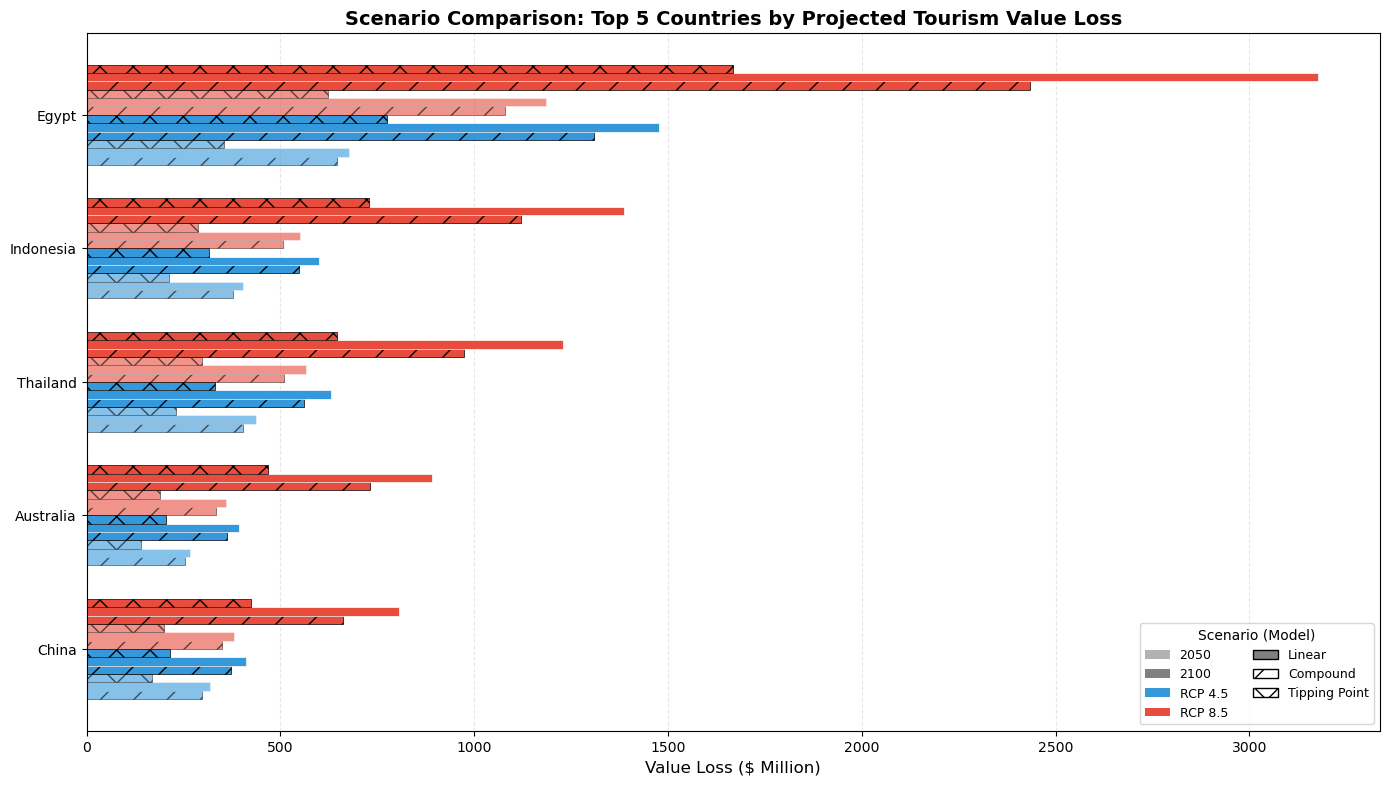

In [36]:
from src.economics import plotting

out = plotting.plot_scenario_comparison(prev_results["results"], top_n=5)

In [ ]:
results["results"].results.keys()


In [ ]:
exp_col = "Sum of reef-associated visitor expenditure (1000)"
total = (
    pd.read_csv(
        "/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/reef_cover_economics/data/economics/tourism/A1_summary_data.csv"
    )[exp_col]
    .replace({",": ""}, regex=True)
    .pipe(pd.to_numeric, errors="coerce")
    * 1000
)
total.sum()

In [ ]:
data["tourism"].gdf.groupby("country")["approx_price_corrected"].sum().sort_values(
    ascending=False
)
